Equilibrium (λ/a,0):
Jacobian Matrix:
[[-4. -2.]
 [ 0. -6.]]
Trace: -10.00
Determinant: 24.00
Stability: Stable Node

Equilibrium (0,μ/d):
Jacobian Matrix:
[[ -1.  -0.]
 [-20.  -2.]]
Trace: -3.00
Determinant: 2.00
Stability: Stable Node

Equilibrium (x∞, y∞):
Jacobian Matrix:
[[ -0.25   -0.125]
 [-15.     -1.5  ]]
Trace: -1.75
Determinant: -1.50
Stability: Saddle Point



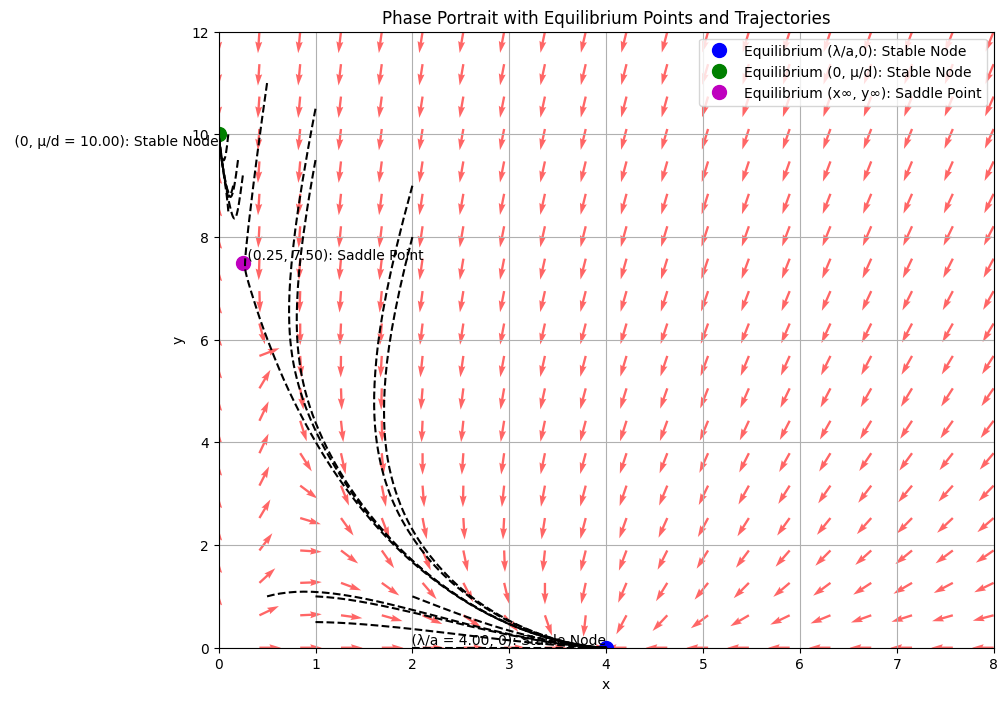

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
lambda_ = 4  # Growth rate of species x
mu = 2       # Growth rate of species y
a = 1        # Competition coefficient for x
b = 1/2      # Effect of y on x
c = 2        # Effect of x on y
d = 0.2      # Competition coefficient for y

# Define the system of ODEs
def odesystem(t, y):
    x, y = y
    dxdt = x * (lambda_ - a * x - b * y)
    dydt = y * (mu - c * x - d * y)
    return [dxdt, dydt]

# Define the Jacobian matrix for the 2-Species Model
def jacobian(x, y):
    J = np.array([
        [lambda_ - 2 * a * x - b * y, -b * x],
        [-c * y, mu - c * x - 2 * d * y]
    ])
    return J

# Compute the equilibrium points
eq1 = [lambda_ / a, 0]
eq2 = [0, mu / d]
eq3 = [(d * lambda_ - b * mu) / (a * d - b * c), (a * mu - c * lambda_) / (a * d - b * c)]

# Calculate Jacobian matrices at the equilibrium points
J_eq1 = jacobian(*eq1)
J_eq2 = jacobian(*eq2)
J_eq3 = jacobian(*eq3)

# Calculate trace and determinant for each Jacobian matrix
def trace_and_det(J):
    trace = np.trace(J)
    determinant = np.linalg.det(J)
    return trace, determinant

trace_eq1, det_eq1 = trace_and_det(J_eq1)
trace_eq2, det_eq2 = trace_and_det(J_eq2)
trace_eq3, det_eq3 = trace_and_det(J_eq3)

# Determine stability
def determine_stability(trace, determinant):
    if trace < 0 and determinant > 0:
        return 'Stable Node'
    elif trace > 0 and determinant > 0:
        return 'Unstable Node'
    else:
        return 'Saddle Point'

stability_eq1 = determine_stability(trace_eq1, det_eq1)
stability_eq2 = determine_stability(trace_eq2, det_eq2)
stability_eq3 = determine_stability(trace_eq3, det_eq3)

# Print stability analysis
print(f'Equilibrium (λ/a,0):\nJacobian Matrix:\n{J_eq1}\nTrace: {trace_eq1:.2f}\nDeterminant: {det_eq1:.2f}')
print(f'Stability: {stability_eq1}\n')
print(f'Equilibrium (0,μ/d):\nJacobian Matrix:\n{J_eq2}\nTrace: {trace_eq2:.2f}\nDeterminant: {det_eq2:.2f}')
print(f'Stability: {stability_eq2}\n')
print(f'Equilibrium (x∞, y∞):\nJacobian Matrix:\n{J_eq3}\nTrace: {trace_eq3:.2f}\nDeterminant: {det_eq3:.2f}')
print(f'Stability: {stability_eq3}\n')

# Create a grid for the phase portrait
x_grid, y_grid = np.meshgrid(np.linspace(0, 8, 20), np.linspace(0, 12, 20))
dx, dy = np.array(odesystem(0, [x_grid.flatten(), y_grid.flatten()]))
dx = dx.reshape(x_grid.shape)
dy = dy.reshape(y_grid.shape)

# Normalize vectors for better visualization
magnitude = np.sqrt(dx**2 + dy**2)
magnitude = np.where(magnitude == 0, 1, magnitude)  # Replace 0 magnitudes with 1 to avoid division by zero
dx /= magnitude
dy /= magnitude

# Plot the phase portrait
plt.figure(figsize=(10, 8))
plt.quiver(x_grid, y_grid, dx, dy, color='r', alpha=0.6)

# Plot equilibrium points
plt.plot(eq1[0], eq1[1], 'bo', markersize=10, label=f'Equilibrium (λ/a,0): {stability_eq1}')
plt.plot(eq2[0], eq2[1], 'go', markersize=10, label=f'Equilibrium (0, μ/d): {stability_eq2}')
plt.plot(eq3[0], eq3[1], 'mo', markersize=10, label=f'Equilibrium (x∞, y∞): {stability_eq3}')

# Add phase lines and trajectories
initial_conditions = [
    [2, 9], [1, 10.5], [0.5, 11], [1, 9.5], [2, 8],
    [2, 0], [1, 1], [0.5, 1], [1, 0.5], [2, 1],
    [0.1, 10], [0.2, 9.5], [0.1, 8.5], [0.15, 9], [0.25, 9.2]
]

t_span = (0, 10)
t_eval = np.linspace(0, 10, 500)

for initial in initial_conditions:
    sol = solve_ivp(odesystem, t_span, initial, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], 'k--')

# Add labels and annotations
plt.text(eq1[0], eq1[1], f' (λ/a = {eq1[0]:.2f}, 0): {stability_eq1}', verticalalignment='bottom', horizontalalignment='right')
plt.text(eq2[0], eq2[1], f' (0, μ/d = {eq2[1]:.2f}): {stability_eq2}', verticalalignment='top', horizontalalignment='right')
plt.text(eq3[0], eq3[1], f' ({eq3[0]:.2f}, {eq3[1]:.2f}): {stability_eq3}', verticalalignment='bottom', horizontalalignment='left')

# Add legend and titles
plt.legend()
plt.title('Phase Portrait with Equilibrium Points and Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 8)
plt.ylim(0, 12)
plt.grid(True)
plt.show()



